In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
data_dir = "data"
records = []

for label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, label)
    if os.path.isdir(class_dir):
        for fname in os.listdir(class_dir):
            if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                fpath = os.path.join(class_dir, fname)
                try:
                    with Image.open(fpath) as img:
                        width, height = img.size
                    records.append({
                        "class": label,
                        "filename": fname,
                        "width": width,
                        "height": height,
                        "aspect_ratio": width / height
                    })
                except Exception as e:
                    print(f"Error loading image {fpath}: {e}")


In [3]:
df = pd.DataFrame(records)

/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_2176/1200317854.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_2176/1200317854.py:8: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(


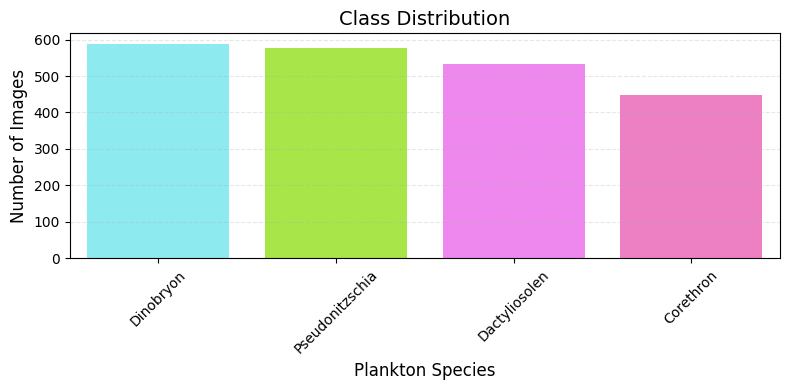

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a light neon-style palette
neon_palette = ["#7DF9FF", "#ADFF2F", "#FF77FF", "#FF6EC7", "#F4BBFF", "#FFB347", "#B0E0E6"]

plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x="class",
    order=df["class"].value_counts().index,
    palette=neon_palette
)
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Plankton Species", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_2176/672126480.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_2176/672126480.py:8: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(


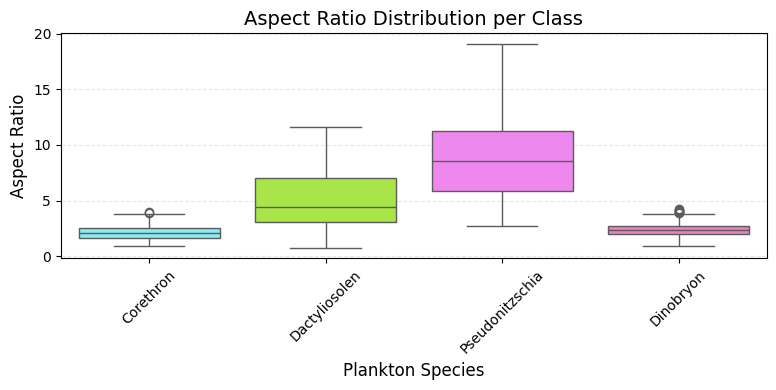

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a light neon-style color palette
neon_palette = ["#7DF9FF", "#ADFF2F", "#FF77FF", "#FF6EC7", "#F4BBFF", "#FFB347", "#B0E0E6"]

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df,
    x="class",
    y="aspect_ratio",
    palette=neon_palette
)
plt.title("Aspect Ratio Distribution per Class", fontsize=14)
plt.xlabel("Plankton Species", fontsize=12)
plt.ylabel("Aspect Ratio", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



Class: Corethron


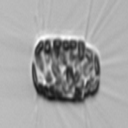

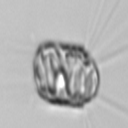

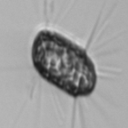


Class: Dactyliosolen


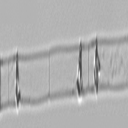

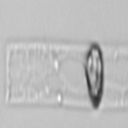

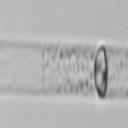


Class: Pseudonitzschia


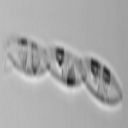

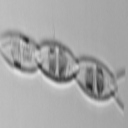

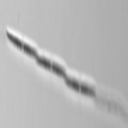


Class: Dinobryon


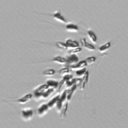

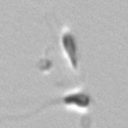

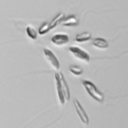

In [6]:
import random
from IPython.display import display

n_samples = 3

for cls in df['class'].unique():
    sample_paths = df[df['class'] == cls].sample(n=min(n_samples, len(df[df['class'] == cls])), random_state=42)['filename']
    print(f"\nClass: {cls}")
    for fname in sample_paths:
        fpath = os.path.join(data_dir, cls, fname)
        display(Image.open(fpath).resize((128, 128)))  # Resize for preview

In [7]:
class_counts = df['class'].value_counts()
print(class_counts)

imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nClass imbalance ratio (max/min): {imbalance_ratio:.2f}")


class
Dinobryon          588
Pseudonitzschia    578
Dactyliosolen      532
Corethron          447
Name: count, dtype: int64

Class imbalance ratio (max/min): 1.32


In [8]:
channel_counts = Counter()

for _, row in df.iterrows():
    fpath = os.path.join(data_dir, row['class'], row['filename'])
    try:
        with Image.open(fpath) as img:
            mode = img.mode  # 'RGB', 'L', etc.
            channel_counts[mode] += 1
    except Exception as e:
        print(f"Corrupt file: {fpath}, Error: {e}")

print("\nImage mode counts:", channel_counts)



Image mode counts: Counter({'L': 2145})


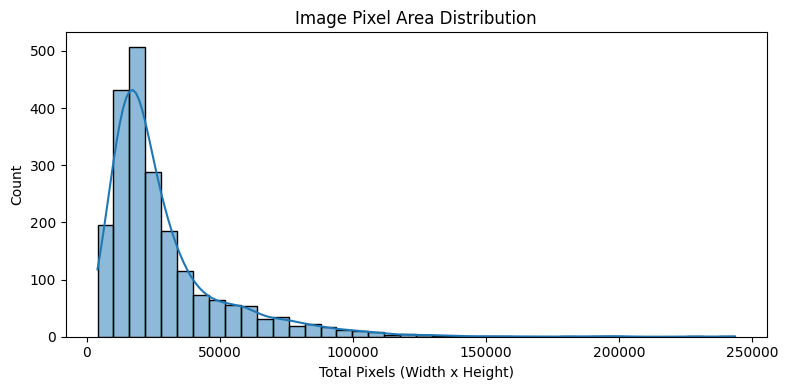

In [15]:
df['size'] = df['width'] * df['height']
plt.figure(figsize=(8, 4))
sns.histplot(df['size'], bins=40, kde=True)
plt.title("Image Pixel Area Distribution")
plt.xlabel("Total Pixels (Width x Height)")
plt.tight_layout()
plt.show()


/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_2176/873356754.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='brightness', palette=neon_palette)
/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_2176/873356754.py:9: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(data=df, x='class', y='brightness', palette=neon_palette)


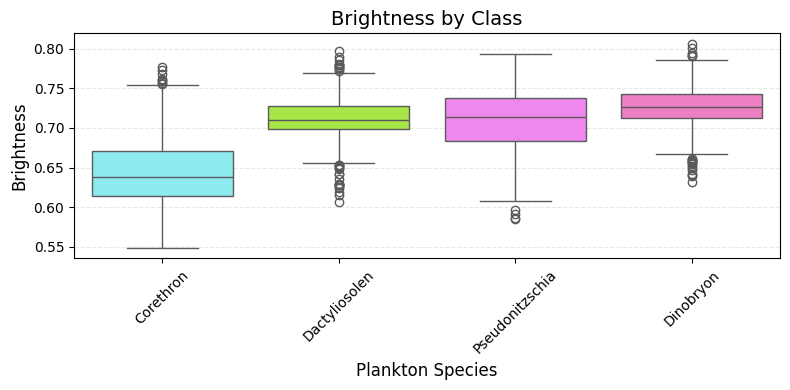

/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_2176/873356754.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='contrast', palette=neon_palette)
/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_2176/873356754.py:20: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(data=df, x='class', y='contrast', palette=neon_palette)


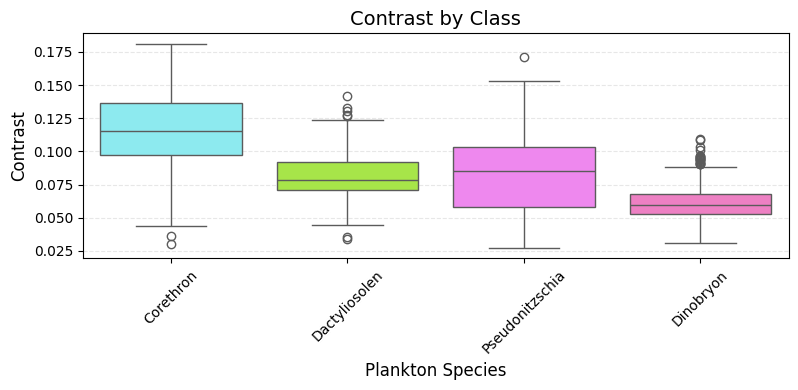

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Neon-style color palette
neon_palette = ["#7DF9FF", "#ADFF2F", "#FF77FF", "#FF6EC7", "#F4BBFF", "#FFB347", "#B0E0E6"]

# Brightness boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='class', y='brightness', palette=neon_palette)
plt.title("Brightness by Class", fontsize=14)
plt.xlabel("Plankton Species", fontsize=12)
plt.ylabel("Brightness", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Contrast boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='class', y='contrast', palette=neon_palette)
plt.title("Contrast by Class", fontsize=14)
plt.xlabel("Plankton Species", fontsize=12)
plt.ylabel("Contrast", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Set fixed params
image_size = 224
batch_size = 32
data_dir = "data"

# Train/test split using ImageFolder
all_data = datasets.ImageFolder(data_dir)
class_names = all_data.classes

# Manually split into train/test
indices = list(range(len(all_data)))
train_idx, val_idx = train_test_split(indices, test_size=0.2, stratify=[all_data.imgs[i][1] for i in indices], random_state=42)

from torch.utils.data import Subset

# Define transforms
train_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

val_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Apply transforms
all_data.transform = train_transforms
train_dataset = Subset(all_data, train_idx)

all_data.transform = val_transforms
val_dataset = Subset(all_data, val_idx)

# Loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


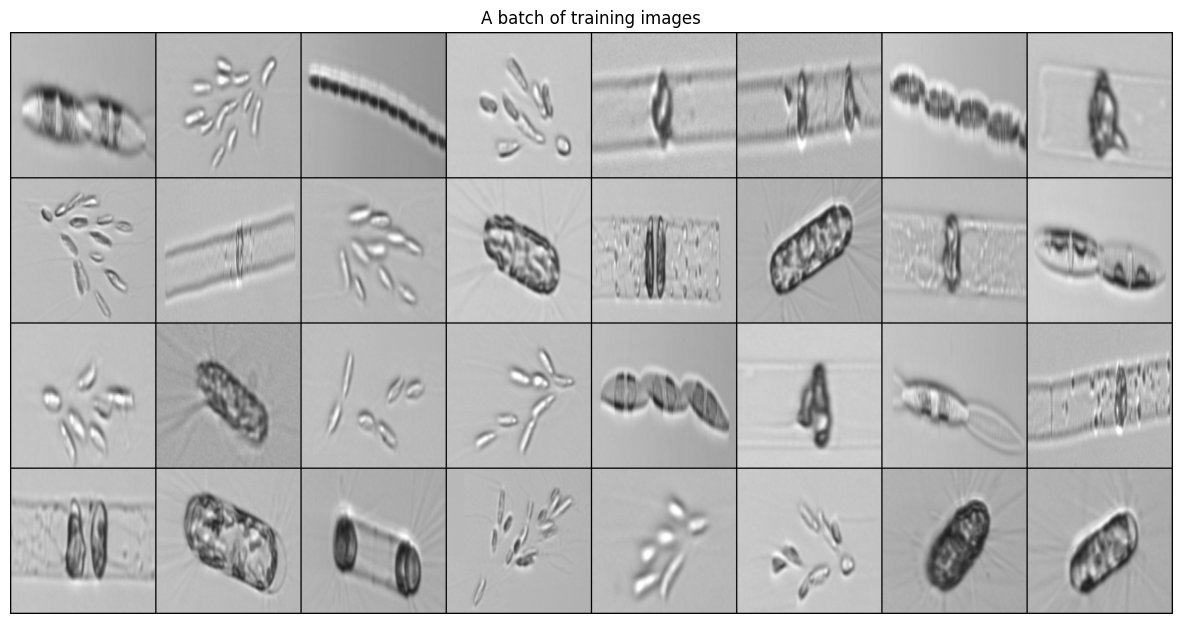

Labels:
['Pseudonitzschia', 'Dinobryon', 'Pseudonitzschia', 'Dinobryon', 'Dactyliosolen', 'Dactyliosolen', 'Pseudonitzschia', 'Dactyliosolen', 'Dinobryon', 'Dactyliosolen', 'Dinobryon', 'Corethron', 'Dactyliosolen', 'Corethron', 'Dactyliosolen', 'Pseudonitzschia', 'Dinobryon', 'Corethron', 'Dinobryon', 'Dinobryon', 'Pseudonitzschia', 'Dactyliosolen', 'Pseudonitzschia', 'Dactyliosolen', 'Dactyliosolen', 'Corethron', 'Corethron', 'Dinobryon', 'Dinobryon', 'Dinobryon', 'Corethron', 'Corethron']


In [23]:
import matplotlib.pyplot as plt
import torchvision

# Get one batch
images, labels = next(iter(train_loader))

# Make a grid from the batch (optional: unnormalize)
def show_images(images, labels, class_names):
    # If normalized with mean=0.5, std=0.5 → undo it
    unnorm_images = images * 0.5 + 0.5  # unnormalize to [0,1]
    img_grid = torchvision.utils.make_grid(unnorm_images, nrow=8)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(img_grid.permute(1, 2, 0))  # Convert from [C, H, W] to [H, W, C]
    plt.title("A batch of training images")
    plt.axis('off')
    plt.show()

    # Optional: Print labels
    print("Labels:")
    print([class_names[i] for i in labels])

# Use it
show_images(images, labels, class_names)
